In [1]:
from pathlib import Path
from warnings import filterwarnings

filterwarnings(action="ignore")

PROJECT_DIR = Path()
DATA_DIR = PROJECT_DIR / "dataset"

## Dataset Preparation

In [2]:
import pandas as pd

sales = (
    pd.read_csv(
        DATA_DIR / "train.csv",
        parse_dates=["date"],
        dtype={
            "store_nbr": "category",
            "family": "category",
            "sales": "float32",
            "onpromotion": "float32",
        },
    )
    .set_index(["date"])
    .set_index(["store_nbr", "family"], append=True)[["sales", "onpromotion"]]
    .unstack()
    .unstack()
)

# Fill in values for missing dates.
missing_idx = set(pd.date_range(sales.index[0], sales.index[-1])) - set(
    sales.index.get_level_values(level=0).unique()
)
for idx in missing_idx:
    sales.loc[idx] = 0.0

sales = sales.stack().sort_index(level=0).stack().reset_index()
sales

,date,store_nbr,family,onpromotion,sales
0,2013-01-01,1,AUTOMOTIVE,0.0,0.000000
1,2013-01-01,1,BABY CARE,0.0,0.000000
2,2013-01-01,1,BEAUTY,0.0,0.000000
3,2013-01-01,1,BEVERAGES,0.0,0.000000
4,2013-01-01,1,BOOKS,0.0,0.000000
...,...,...,...,...,...
3008011,2017-08-15,9,POULTRY,0.0,438.132996
3008012,2017-08-15,9,PREPARED FOODS,1.0,154.552994
3008013,2017-08-15,9,PRODUCE,148.0,2419.729004
3008014,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,8.0,121.000000


In [3]:
# Supplementary datasets
oil_prices = (
    pd.read_csv(
        DATA_DIR / "oil.csv",
        parse_dates=["date"],
        dtype={"dcoilwtico": "float32"},
    )
    .merge(
        pd.DataFrame({"date": sales["date"].unique()}),
        on="date",
        how="right",
    )
    .interpolate(method="bfill")
)

holidays = (
    pd.read_csv(
        DATA_DIR / "holidays_events.csv",
        parse_dates=["date"],
    )
    .drop(["locale_name", "description"], axis="columns")
    .rename(columns={"type": "holiday_type"})
)

stores = pd.read_csv(
    DATA_DIR / "stores.csv",
    dtype={
        "store_nbr": "category",
        "city": "category",
        "state": "category",
        "type": "category",
        "cluster": "category",
    },
).rename(columns={"type": "store_type"})

display(oil_prices, holidays, stores)

,date,dcoilwtico
0,2013-01-01,93.139999
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-05,93.199997
...,...,...
1683,2017-08-11,48.810001
1684,2017-08-12,47.590000
1685,2017-08-13,47.590000
1686,2017-08-14,47.590000


,date,holiday_type,locale,transferred
0,2012-03-02,Holiday,Local,False
1,2012-04-01,Holiday,Regional,False
2,2012-04-12,Holiday,Local,False
3,2012-04-14,Holiday,Local,False
4,2012-04-21,Holiday,Local,False
...,...,...,...,...
345,2017-12-22,Additional,National,False
346,2017-12-23,Additional,National,False
347,2017-12-24,Additional,National,False
348,2017-12-25,Holiday,National,False


,store_nbr,city,state,store_type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [8]:
dataset = (
    sales.merge(oil_prices, on="date")
    .merge(holidays, on="date", how="left")
    .merge(stores, on="store_nbr")
    .merge(
        pd.DataFrame({"date": sales["date"].unique()})
        .reset_index()
        .rename(columns={"index": "time_idx"})
    )
)
dataset["holiday_type"] = dataset["holiday_type"].fillna("Work Day").astype("category")
dataset["locale"] = dataset["locale"].fillna("-").astype("category")
dataset["transferred"] = (
    dataset["transferred"]
    .fillna(False)
    .map({True: "yes", False: "no"})
    .astype("category")
)

# Time Features
dataset["month"] = dataset["date"].dt.month.astype("str").astype("category")
dataset["day"] = dataset["date"].dt.day.astype("str").astype("category")

dataset

,date,store_nbr,family,onpromotion,sales,dcoilwtico,holiday_type,locale,transferred,city,state,store_type,cluster,time_idx,month,day
0,2013-01-01,1,AUTOMOTIVE,0.0,0.000000,93.139999,Holiday,National,no,Quito,Pichincha,D,13,0,1,1
1,2013-01-01,1,BABY CARE,0.0,0.000000,93.139999,Holiday,National,no,Quito,Pichincha,D,13,0,1,1
2,2013-01-01,1,BEAUTY,0.0,0.000000,93.139999,Holiday,National,no,Quito,Pichincha,D,13,0,1,1
3,2013-01-01,1,BEVERAGES,0.0,0.000000,93.139999,Holiday,National,no,Quito,Pichincha,D,13,0,1,1
4,2013-01-01,1,BOOKS,0.0,0.000000,93.139999,Holiday,National,no,Quito,Pichincha,D,13,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061471,2017-08-15,9,POULTRY,0.0,438.132996,47.570000,Holiday,Local,no,Quito,Pichincha,B,6,1687,8,15
3061472,2017-08-15,9,PREPARED FOODS,1.0,154.552994,47.570000,Holiday,Local,no,Quito,Pichincha,B,6,1687,8,15
3061473,2017-08-15,9,PRODUCE,148.0,2419.729004,47.570000,Holiday,Local,no,Quito,Pichincha,B,6,1687,8,15
3061474,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,8.0,121.000000,47.570000,Holiday,Local,no,Quito,Pichincha,B,6,1687,8,15


### Torch Dataset and Loader

In [ ]:
from pytorch_forecasting import TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer

horizon = 30  # days
max_enc_len = 24
max_train_idx = dataset["time_idx"].max() - horizon

train = TimeSeriesDataSet(
    dataset[lambda x: x.time_idx <= max_train_idx],
    time_idx="time_idx",
    target="sales",
    group_ids=["store_nbr", "family"],
    # Keep encoder length long (as it is in the validation set)
    min_encoder_length=max_enc_len // 2,
    max_encoder_length=max_enc_len,
    min_prediction_length=1,
    max_prediction_length=horizon,
    static_categoricals=[
        "store_nbr",
        "family",
        "city",
        "state",
        "store_type",
        "cluster",
    ],
    static_reals=[],
    time_varying_known_categoricals=["day", "month"],
    # Group of categorical variables can be treated as one variable.
    variable_groups={},
    time_varying_known_reals=["time_idx", "onpromotion"],
    time_varying_unknown_categoricals=["holiday_type", "locale", "transferred"],
    time_varying_unknown_reals=[
        "sales",
        "dcoilwtico",
    ],
    target_normalizer=GroupNormalizer(
        groups=["store_nbr", "family"], transformation="softplus"
    ),  # use softplus and normalize by group
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
)

validation = TimeSeriesDataSet.from_dataset(
    train, dataset, predict=True, stop_randomization=True
)

batch_size = 128
train_dataloader = train.to_dataloader(
    train=True, batch_size=batch_size, num_workers=0
)
val_dataloader = validation.to_dataloader(
    train=False, batch_size=batch_size * 10, num_workers=0
)

(286, 256)

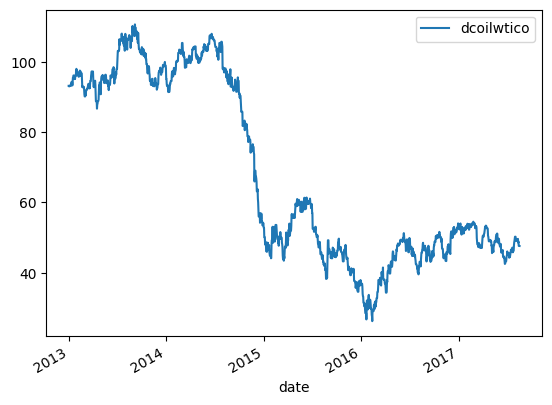

In [16]:
ax = oil_prices.set_index("date").plot()
# oil_prices.set_index("date").interpolate(method="cubic").plot(ax=ax)